In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/tcc_ceds_music.csv')
print(df.columns)
print(df.head)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')
<bound method NDFrame.head of        Unnamed: 0           artist_name                     track_name  \
0               0                mukesh           mohabbat bhi jhoothi   
1               4         frankie laine                      i believe   
2               6           johnnie ray                            cry   
3              10           pérez prado                       patricia   
4              12  giorgos papadopoulos             apopse eida oneiro   
...           ...         

In [5]:
# --- Step 1: Data Cleaning and Preparation ---

# Drop the redundant 'Unnamed: 0' column
df_cleaned = df.drop('Unnamed: 0', axis=1)

# Rename the 'release_date' column to 'year' for clarity
df_cleaned = df_cleaned.rename(columns={'release_date': 'year'})

# Check for missing values in each column
print("Missing values in each column:")
print(df_cleaned.isnull().sum())

# Display the first 5 rows of our new, cleaned DataFrame
print("\nFirst 5 rows of the cleaned data:")
print(df_cleaned.head())

Missing values in each column:
artist_name                 0
track_name                  0
year                        0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

First 5 rows of the cleaned data:
            artist_na

In [6]:
# --- Step 2: Feature Engineering ---

# Calculate the decade for each song
# We use integer division (//) to achieve this easily.
# Example: 1958 // 10 * 10 = 195 * 10 = 1950
df_cleaned['decade'] = (df_cleaned['year'] // 10) * 10

# Display the first 5 rows again to see our new 'decade' column
print("\nData with the new 'decade' column:")
print(df_cleaned.head())


Data with the new 'decade' column:
            artist_name            track_name  year genre  \
0                mukesh  mohabbat bhi jhoothi  1950   pop   
1         frankie laine             i believe  1950   pop   
2           johnnie ray                   cry  1950   pop   
3           pérez prado              patricia  1950   pop   
4  giorgos papadopoulos    apopse eida oneiro  1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  night/time  ...  feelings  danceability  loudness  \
0    0.000598    0.000598  ...  0.117175  

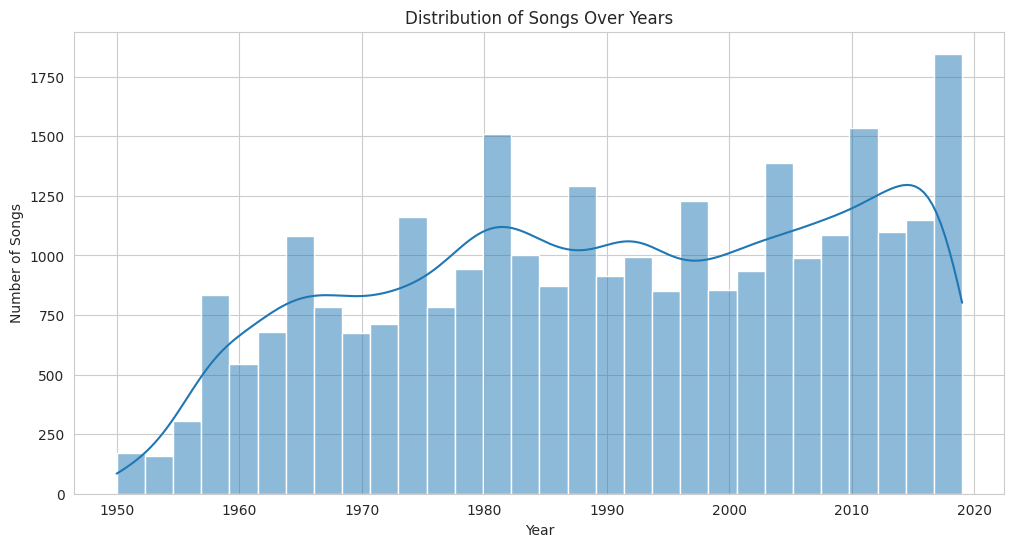

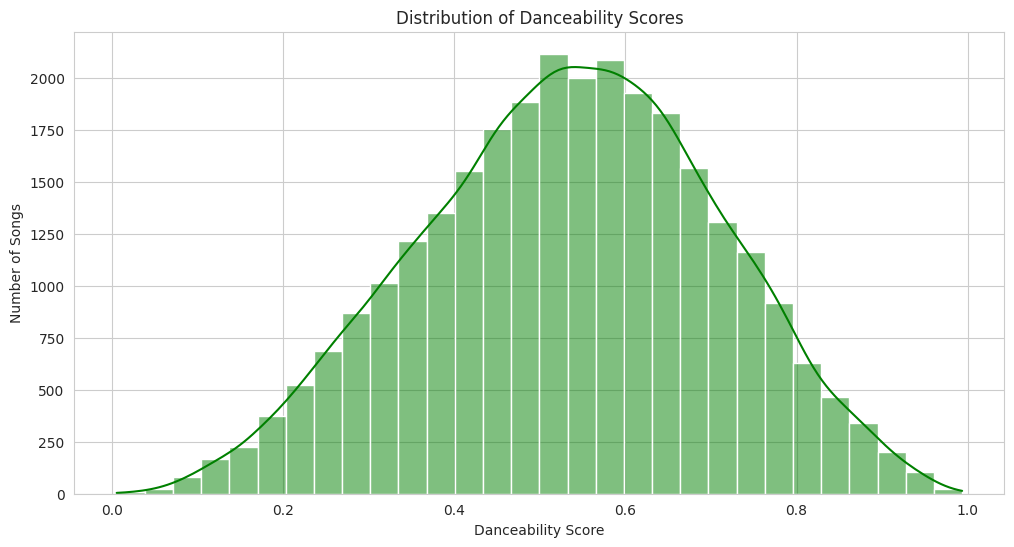

/tmp/ipython-input-3927561750.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df_cleaned, order=top_genres, palette='viridis')


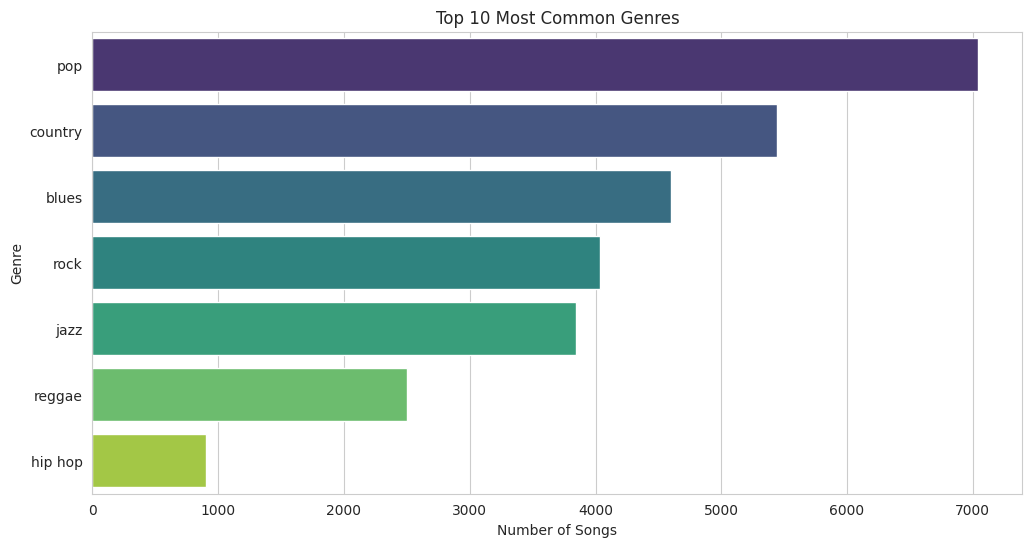

In [7]:
# --- Step 3: Univariate Analysis ---

# Set the style for our plots for better aesthetics
sns.set_style('whitegrid')

# 1. Visualize the distribution of songs over the years
plt.figure(figsize=(12, 6)) # Set the figure size
sns.histplot(df_cleaned['year'], bins=30, kde=True)
plt.title('Distribution of Songs Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show() # This command displays the plot

# 2. Visualize the distribution of the 'danceability' score
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['danceability'], bins=30, kde=True, color='green')
plt.title('Distribution of Danceability Scores')
plt.xlabel('Danceability Score')
plt.ylabel('Number of Songs')
plt.show()

# 3. Visualize the top 10 most common genres
plt.figure(figsize=(12, 6))
# Get the top 10 genres by counting their occurrences
top_genres = df_cleaned['genre'].value_counts().nlargest(10).index
sns.countplot(y='genre', data=df_cleaned, order=top_genres, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

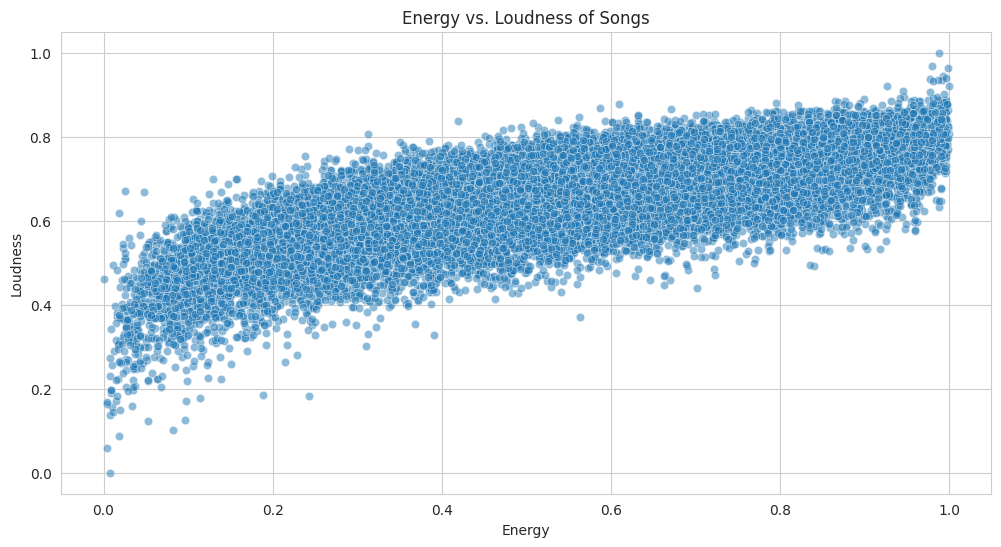

/tmp/ipython-input-3571707979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade', y='danceability', data=df_cleaned, order=decade_order, palette='magma')


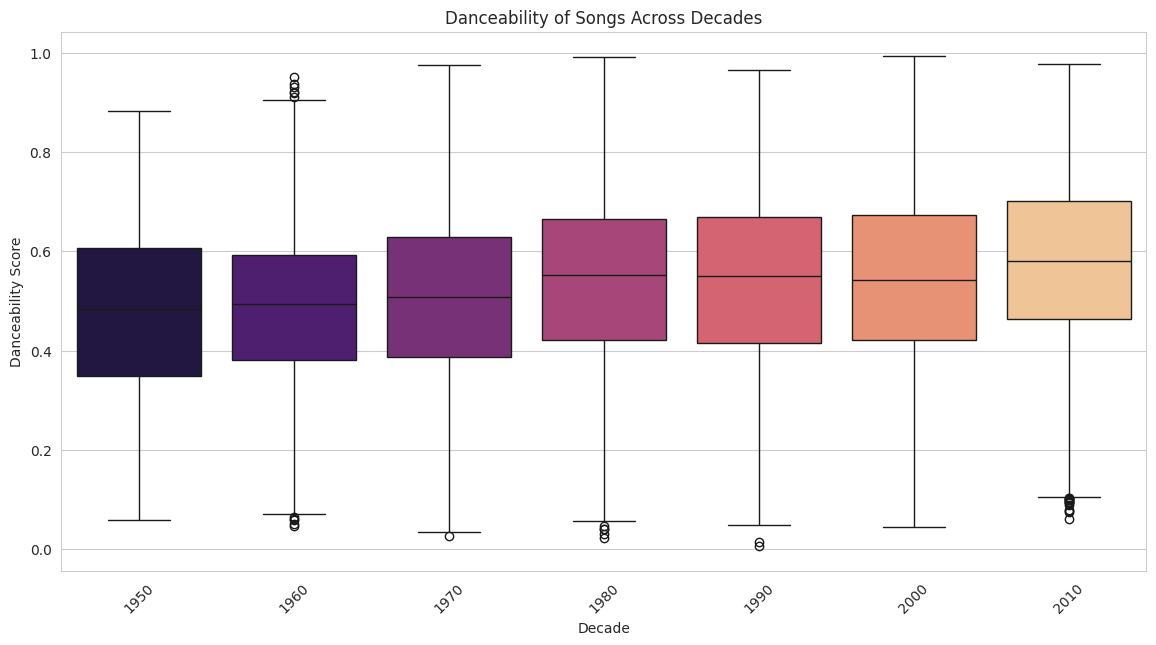

/tmp/ipython-input-3571707979.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='valence', data=df_top_5_genres, palette='pastel')


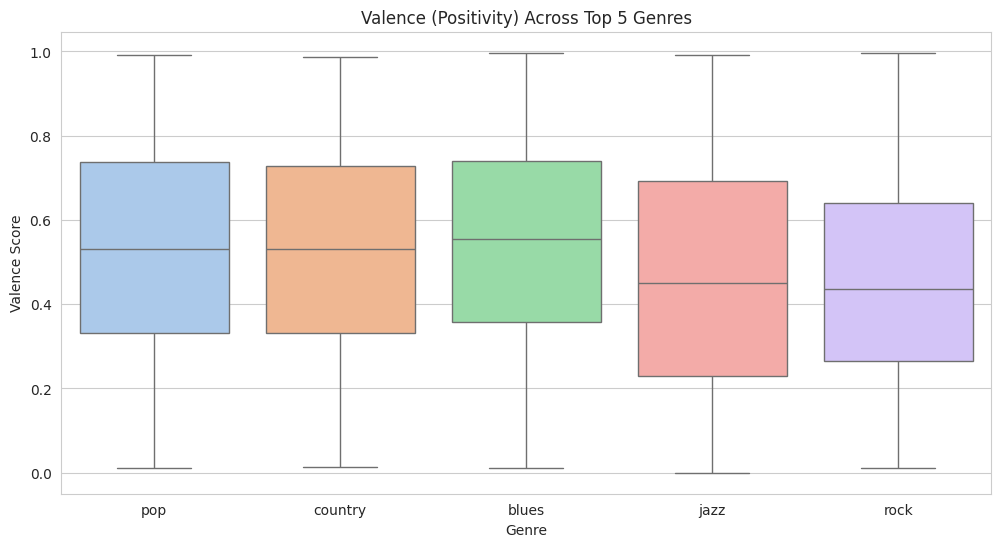

In [8]:
# --- Step 4: Bivariate Analysis ---

# 1. Scatter plot to see the relationship between 'energy' and 'loudness'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='energy', y='loudness', data=df_cleaned, alpha=0.5) # alpha adds transparency
plt.title('Energy vs. Loudness of Songs')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

# 2. Box plot to compare 'danceability' across decades
# We'll order the decades for a proper time-series view
decade_order = sorted(df_cleaned['decade'].unique())
plt.figure(figsize=(14, 7))
sns.boxplot(x='decade', y='danceability', data=df_cleaned, order=decade_order, palette='magma')
plt.title('Danceability of Songs Across Decades')
plt.xlabel('Decade')
plt.ylabel('Danceability Score')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

# 3. Box plot to compare 'valence' (positivity) across the top 5 genres
top_5_genres = df_cleaned['genre'].value_counts().nlargest(5).index
df_top_5_genres = df_cleaned[df_cleaned['genre'].isin(top_5_genres)] # Filter for top 5 genres

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='valence', data=df_top_5_genres, palette='pastel')
plt.title('Valence (Positivity) Across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Valence Score')
plt.show()

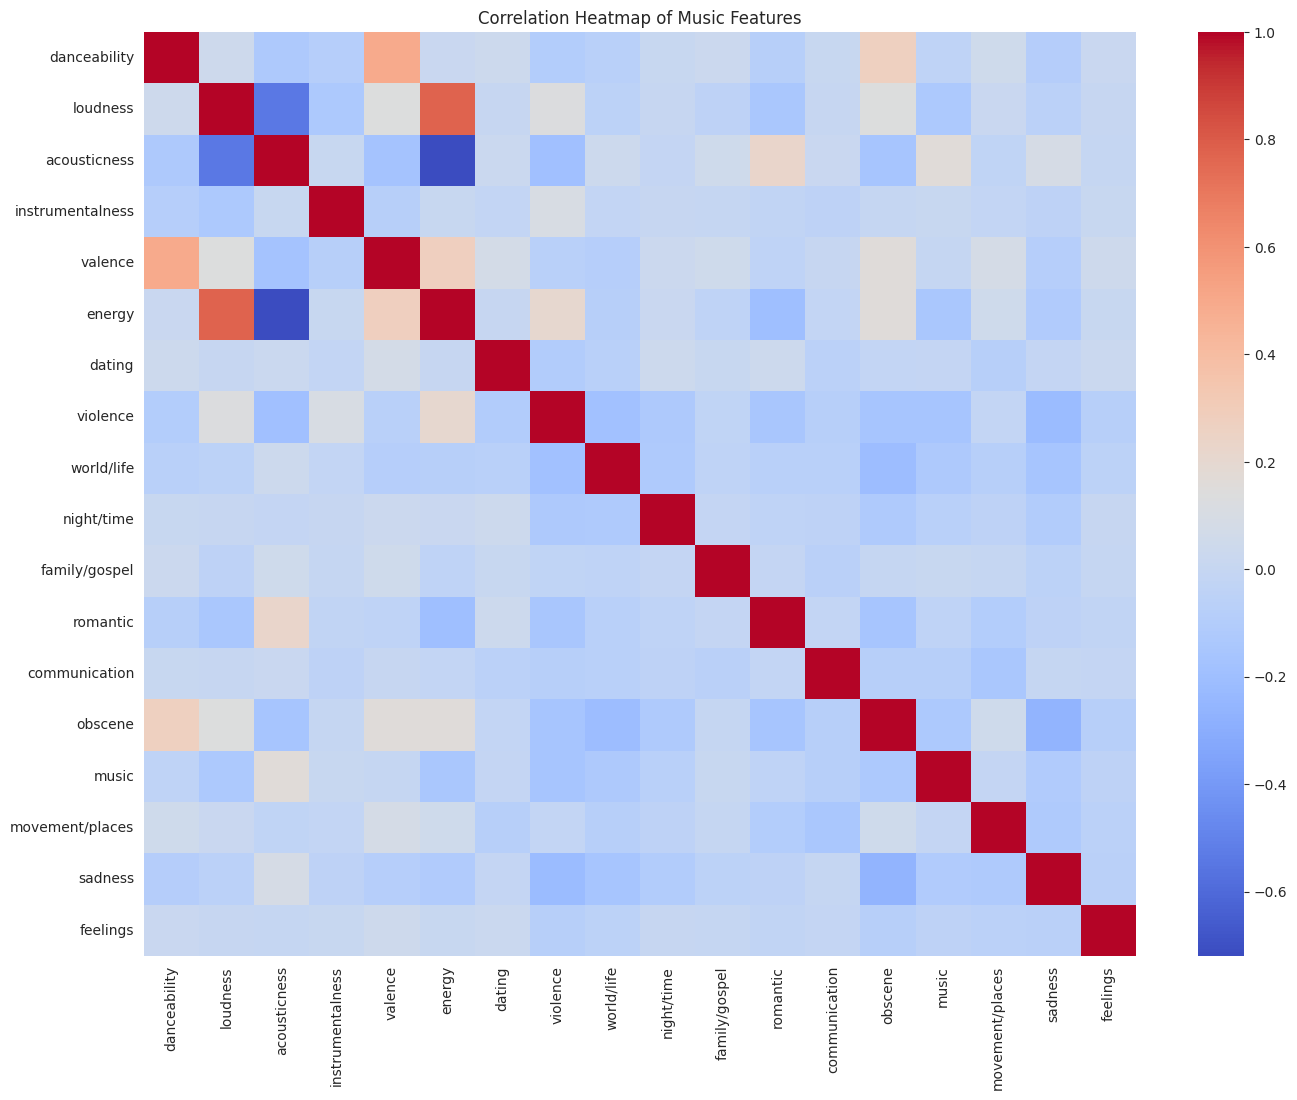

In [9]:
# --- Step 5: Multivariate Analysis ---

# First, let's select only the columns that are numerical and interesting for correlation
# These are our core audio and lyrical features
numerical_features = [
    'danceability', 'loudness', 'acousticness', 'instrumentalness',
    'valence', 'energy', 'dating', 'violence', 'world/life', 'night/time',
    'family/gospel', 'romantic', 'communication', 'obscene', 'music',
    'movement/places', 'sadness', 'feelings'
]

# Create a new DataFrame with only these features
df_numerical = df_cleaned[numerical_features]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create the heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=False keeps it clean
plt.title('Correlation Heatmap of Music Features')
plt.show()

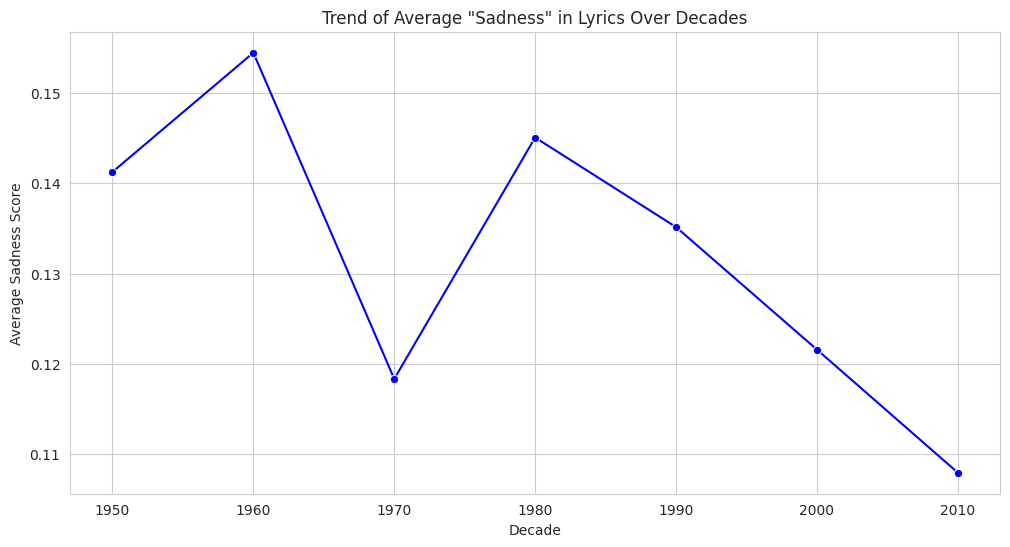

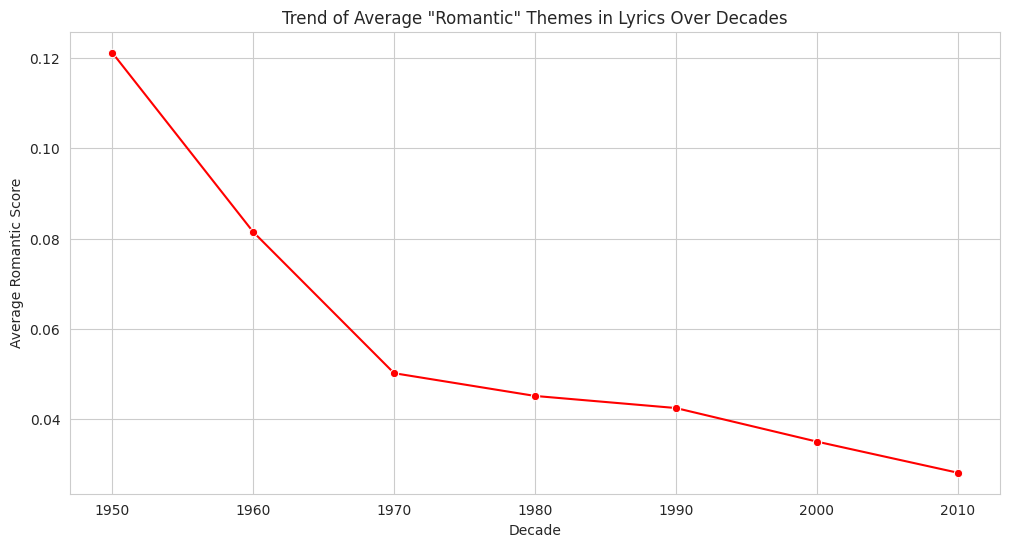

In [10]:
# --- Enhancement 1: Lyrical Theme Analysis ---

# Let's analyze the average 'sadness' and 'romantic' scores per decade
lyrical_themes_by_decade = df_cleaned.groupby('decade')[['sadness', 'romantic', 'obscene']].mean().reset_index()

# Plotting the trend of 'sadness' in lyrics over decades
plt.figure(figsize=(12, 6))
sns.lineplot(x='decade', y='sadness', data=lyrical_themes_by_decade, marker='o', color='blue')
plt.title('Trend of Average "Sadness" in Lyrics Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Sadness Score')
plt.grid(True)
plt.show()

# Plotting the trend of 'romantic' themes in lyrics over decades
plt.figure(figsize=(12, 6))
sns.lineplot(x='decade', y='romantic', data=lyrical_themes_by_decade, marker='o', color='red')
plt.title('Trend of Average "Romantic" Themes in Lyrics Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Romantic Score')
plt.grid(True)
plt.show()

/tmp/ipython-input-641054214.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='rocket')


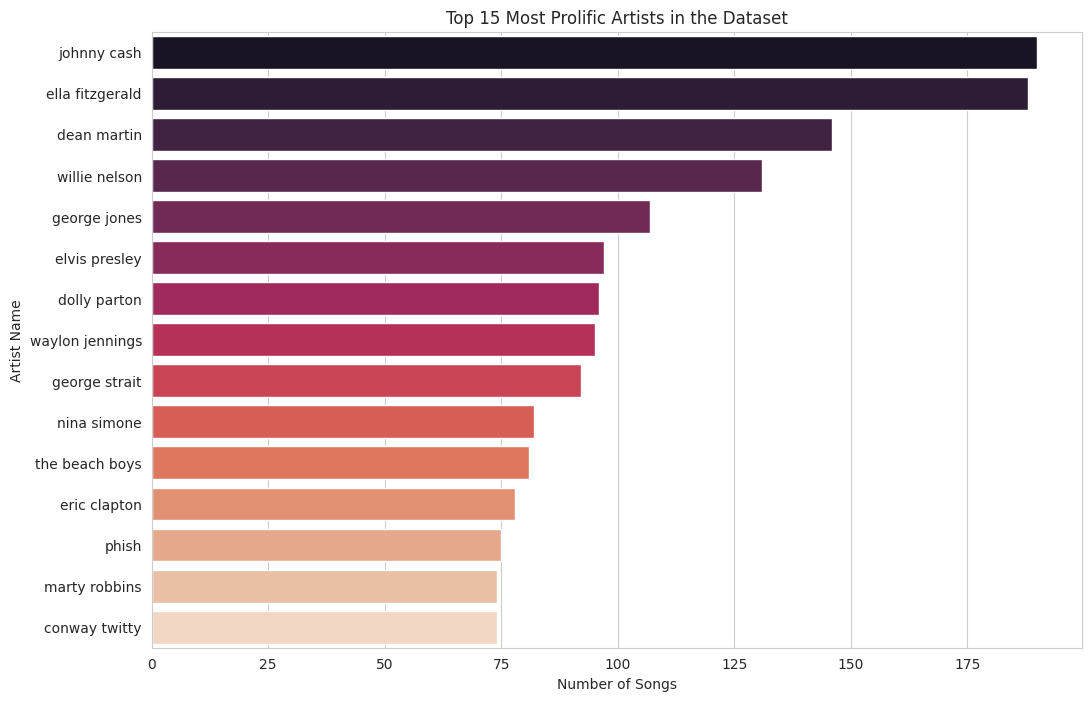


Top 10 Artists by Average Danceability:
artist_name
timbaland            0.987003
georg levin          0.979422
run–d.m.c.           0.970757
mc hammer            0.968591
katie noel           0.961009
lil baby             0.960468
clemens              0.959926
travis porter        0.955594
the reggae boys      0.952345
grandmaster flash    0.951262
Name: danceability, dtype: float64


In [11]:
# --- Enhancement 2: Artist-Level Analysis ---

# 1. Find and plot the Top 15 most prolific artists
top_artists = df_cleaned['artist_name'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='rocket')
plt.title('Top 15 Most Prolific Artists in the Dataset')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

# 2. Find the Top 10 artists with the highest average danceability
# We first group by artist and calculate the mean danceability for each
# Then we sort and take the top 10
artist_danceability = df_cleaned.groupby('artist_name')['danceability'].mean().sort_values(ascending=False).nlargest(10)

print("\nTop 10 Artists by Average Danceability:")
print(artist_danceability)